In [1]:
import numpy as np
import os
from sklearn.cross_validation import train_test_split
from PIL import Image
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten, Reshape
from keras.optimizers import RMSprop
from keras import backend as K
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D, Conv2D
from keras.utils import plot_model
from keras.models import load_model, model_from_json

C:\Program Files\Anaconda3\envs\venv\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
Using TensorFlow backend.


In [2]:
batch_size = 128
num_classes = 10
epochs = 20
img_rows, img_cols = 28, 28

In [3]:
# reference : http://enakai00.hatenablog.com/entry/2016/08/02/102917
class NotMNIST:
    def __init__(self):
        images, labels = [], []

        for i, letter in enumerate(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']):

            directory = 'C://Users/Choi Seung Yeon/Desktop/2017-2 project/sc/notMNIST_small/%s/' % letter

            files = os.listdir(directory)
            label = np.array([0] * 10)
            label[i] = 1
            for file in files:
                try:
                    im = Image.open(directory + file)
                except:
                    print
                    "Skip a corrupted file: " + file
                    continue
                pixels = np.array(im.convert('L').getdata())
                images.append(pixels / 255.0)
                labels.append(label)

        train_images, test_images, train_labels, test_labels = \
            train_test_split(images, labels, test_size=0.2, random_state=0)

        class train:
            def __init__(self):
                self.images = []
                self.labels = []
                self.batch_counter = 0

            def next_batch(self, num):
                if self.batch_counter + num >= len(self.labels):
                    batch_images = self.images[self.batch_counter:]
                    batch_labels = self.labels[self.batch_counter:]
                    left = num - len(batch_labels)
                    batch_images.extend(self.images[:left])
                    batch_labels.extend(self.labels[:left])
                    self.batch_counter = left
                else:
                    batch_images = self.images[self.batch_counter:self.batch_counter + num]
                    batch_labels = self.labels[self.batch_counter:self.batch_counter + num]
                    self.batch_counter += num

                return (batch_images, batch_labels)

        class test:
            def __init__(self):
                self.images = []
                self.labels = []

        self.train = train()
        self.test = test()

        self.train.images = train_images
        self.train.labels = train_labels
        self.test.images = test_images
        self.test.labels = test_labels

In [4]:
mnist = NotMNIST()

x_train = np.array(mnist.train.images)
y_train = np.array(mnist.train.labels)
x_test = np.array(mnist.test.images)
y_test = np.array(mnist.test.labels)

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)   


In [5]:
# ALEXNET
model = Sequential()
model.add(Reshape(input_shape=input_shape, target_shape=(784, )))
model.add(Dense(128, name="hidden"))
model.add(Activation('relu', name="ReLU"))
model.add(Dense(10, name="output"))
model.add(Activation('softmax', name="softmax"))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 784)               0         
_________________________________________________________________
hidden (Dense)               (None, 128)               100480    
_________________________________________________________________
ReLU (Activation)            (None, 128)               0         
_________________________________________________________________
output (Dense)               (None, 10)                1290      
_________________________________________________________________
softmax (Activation)         (None, 10)                0         
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [7]:
# 1. TensorBoardコールバックを作成する
from keras.callbacks import TensorBoard
tbcb = TensorBoard(log_dir='./graph',
                   histogram_freq=0, write_graph=True)

In [8]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

Train on 14979 samples, validate on 3745 samples
Epoch 1/20
14979/14979 [==============================] - 0s - loss: 0.0991 - acc: 0.9685 - val_loss: 0.0592 - val_acc: 0.9813
Epoch 2/20
14979/14979 [==============================] - 0s - loss: 0.0611 - acc: 0.9808 - val_loss: 0.0663 - val_acc: 0.9786
Epoch 3/20
14979/14979 [==============================] - 0s - loss: 0.0522 - acc: 0.9834 - val_loss: 0.0631 - val_acc: 0.9790
Epoch 4/20
14979/14979 [==============================] - 0s - loss: 0.0467 - acc: 0.9848 - val_loss: 0.0451 - val_acc: 0.9856
Epoch 5/20
14979/14979 [==============================] - 0s - loss: 0.0423 - acc: 0.9863 - val_loss: 0.0576 - val_acc: 0.9819
Epoch 6/20
14979/14979 [==============================] - 0s - loss: 0.0386 - acc: 0.9876 - val_loss: 0.0449 - val_acc: 0.9856
Epoch 7/20
14979/14979 [==============================] - 0s - loss: 0.0353 - acc: 0.9886 - val_loss: 0.0427 - val_acc: 0.9865
Epoch 8/20
14979/14979 [==============================] - 0s -

In [9]:
import pickle

# Model history save
with open("history.pickle", mode='wb') as f:
    pickle.dump(history.history, f)

In [10]:
# evaluate the model
scores = model.evaluate(x_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

acc: 98.64%


In [11]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [12]:
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


In [13]:
# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(x_test, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

acc: 98.64%


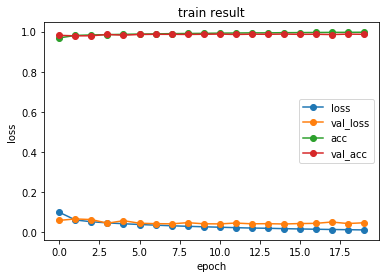

In [14]:
import pickle
import matplotlib.pyplot as plt

# Model history load
history = None
with open('history.pickle', mode='rb') as f:
    history = pickle.load(f)

plt.plot(history['loss'],"o-",label="loss",)
plt.plot(history['val_loss'],"o-",label="val_loss")
plt.plot(history['acc'],"o-",label="acc",)
plt.plot(history['val_acc'],"o-",label="val_acc")
plt.title('train result')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(loc='center right')
plt.show()

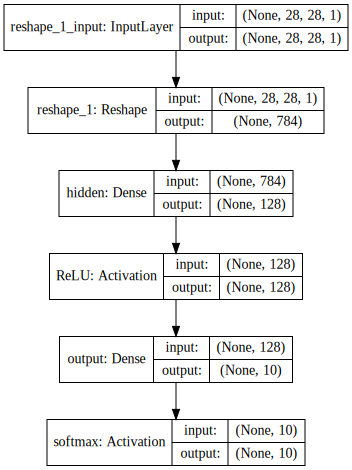

In [16]:
#Visualation
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

%matplotlib inline

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))